In [1]:
# 1. What are the primary objectives of the churn analysis project?
# To create a model to predict whether or not a customer will churn.
# What is the current churn rate? How many customers are we losing within a specific period (monthly, quarterly, yearly)?
# Which customers are churning? Are there particular segments (demographics, usage patterns, etc.) where churn is more prevalent?

# 2. What are the Factors and Patterns
# What are the primary factors contributing to churn? Which variables (e.g., customer service interactions, usage patterns, product issues) are most strongly associated with churn?
# How do different factors influence churn? How do changes in pricing, product features, or customer service affect churn rates?
# Are there early warning signs of churn? Can we identify behaviors or patterns that typically precede churn, allowing us to take preemptive actions?

# 3. Predictive Modeling
# How accurate is the churn prediction model? What is the model’s performance in terms of accuracy, precision, recall, and F1 score?
# Which features are most important in predicting churn? What are the key predictors that the model relies on to forecast churn?
# How does the model handle different customer segments? 
# Is the model equally effective across various customer demographics or segments?

# 4. Business Implications
# What is the financial impact of churn? # How much revenue are we losing due to churn, and what is the potential ROI of reducing churn?
# What is the lifetime value (LTV) of a customer who churns? How does the LTV of churned customers compare to those who remain loyal?

# 5. Actionable Insights
# What strategies can we implement to reduce churn? What specific actions can be taken to retain at-risk customers?
# How can we improve customer retention? What changes to our products, services, or customer engagement strategies might help keep customers?
# How should we prioritize retention efforts? Which customer segments or behaviors should we focus on first to maximize retention impact?

# 1. Data Collection and Loading

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, make_scorer, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

# Set visualization style
sns.set(style="whitegrid")

In [4]:
# Load the data from the Excel file
file_path = 'churn1.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
data.head()

First few rows of the dataset:


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [5]:
# Display basic information about the dataset
print("\nBasic information about the dataset:")
print(data.info())


Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null  

In [6]:
# Display statistical summary of the dataset
print("\nStatistical summary of the dataset:")
print(data.describe())


Statistical summary of the dataset:
        Count      Zip Code     Latitude    Longitude  Tenure Months  \
count  7043.0   7043.000000  7043.000000  7043.000000    7043.000000   
mean      1.0  93521.964646    36.282441  -119.798880      32.371149   
std       0.0   1865.794555     2.455723     2.157889      24.559481   
min       1.0  90001.000000    32.555828  -124.301372       0.000000   
25%       1.0  92102.000000    34.030915  -121.815412       9.000000   
50%       1.0  93552.000000    36.391777  -119.730885      29.000000   
75%       1.0  95351.000000    38.224869  -118.043237      55.000000   
max       1.0  96161.000000    41.962127  -114.192901      72.000000   

       Monthly Charges  Churn Value  Churn Score         CLTV  
count      7043.000000  7043.000000  7043.000000  7043.000000  
mean         64.761692     0.265370    58.699418  4400.295755  
std          30.090047     0.441561    21.525131  1183.057152  
min          18.250000     0.000000     5.000000  2003.000

# 2. Data Cleaning

In [8]:
# Handle Missing Values: Convert 'Total Charges' to numeric
data['Total Charges'] = pd.to_numeric(data['Total Charges'], errors='coerce')
data['Total Charges'].fillna(data['Total Charges'].median(), inplace=True)

In [9]:
# Convert appropriate columns to categorical data types
categorical_cols = ['Country', 'State', 'City', 'Gender', 'Senior Citizen', 'Partner', 
                    'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 
                    'Online Security', 'Online Backup', 'Device Protection', 
                    'Tech Support', 'Streaming TV', 'Streaming Movies', 
                    'Contract', 'Paperless Billing', 'Payment Method', 
                    'Churn Label', 'Churn Reason']  # Include 'Churn Reason'

for col in categorical_cols:
    data[col] = data[col].astype('category')

# Map binary columns to numeric values (if needed)
data['Senior Citizen'] = data['Senior Citizen'].map({'Yes': 1, 'No': 0})

In [10]:
# Drop the 'CustomerID' column since it is not relevant for analysis
data = data.drop(columns=['CustomerID'])

In [11]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Count              7043 non-null   int64   
 1   Country            7043 non-null   category
 2   State              7043 non-null   category
 3   City               7043 non-null   category
 4   Zip Code           7043 non-null   int64   
 5   Lat Long           7043 non-null   object  
 6   Latitude           7043 non-null   float64 
 7   Longitude          7043 non-null   float64 
 8   Gender             7043 non-null   category
 9   Senior Citizen     7043 non-null   category
 10  Partner            7043 non-null   category
 11  Dependents         7043 non-null   category
 12  Tenure Months      7043 non-null   int64   
 13  Phone Service      7043 non-null   category
 14  Multiple Lines     7043 non-null   category
 15  Internet Service   7043 non-null   category
 16  Online

In [12]:
# Save cleaned data
data.to_csv('cleaned_churn_data.csv', index=False)

# 3. Exploratory Data Analysis (EDA)

In [14]:
# Univariate Analysis: Analyze individual features using histograms, bar plots, etc.
# Bivariate Analysis: Explore relationships between features and the target variable using scatter plots, correlation matrices, etc.
# Visualize Churn Distribution: Examine how churn varies across different features.

In [15]:
# 2. What are the Factors and Patterns

In [16]:
# 1. What is the current churn rate? How many customers are we losing within a specific period (monthly, quarterly, yearly)?

# Calculate overall churn rate
overall_churn_rate = data['Churn Value'].mean()
print(f"Overall Churn Rate: {overall_churn_rate:.2%}")

Overall Churn Rate: 26.54%


In [17]:
# Calculate monthly churn rate if 'tenure_months' as a time-based feature
# Here assuming the 'Tenure Months' column represents the tenure of the customer
monthly_churn_rate = data.groupby(data['Tenure Months'] // 30)['Churn Value'].mean()
print("\nMonthly Churn Rate:")
print(monthly_churn_rate)


Monthly Churn Rate:
Tenure Months
0    0.394788
1    0.181316
2    0.066757
Name: Churn Value, dtype: float64


In [18]:
# Tenure Month 0 (39.48%): Almost 40% of customers churn in their first month. This high churn rate indicates that a large number of new customers are dissatisfied or not finding value immediately and leaving the service very quickly. This could point to issues with onboarding, customer expectations, or the initial experience.
# Tenure Month 1 (18.13%): The churn rate drops significantly after the first month, indicating that once customers get past the initial month, they are less likely to leave immediately. However, 18.13% is still relatively high and suggests that early engagement needs improvement.
 #Tenure Month 2 (6.68%): By the third month, the churn rate has dropped to a more manageable 6.68%. This suggests that if customers can be retained through the initial period, they are more likely to stay longer.

In [19]:
# Key Insights:
# Early Churn is Critical: The extremely high churn rate in the first month indicates a critical period where customers are deciding whether the service is worth continuing. This period requires focused interventions, such as improved onboarding processes, initial support, and ensuring that the product meets customer expectations.
# Retention Improves Over Time: The decrease in churn rate over the first few months suggests that customers who find value in the early stages are more likely to remain. Efforts to engage customers meaningfully during this time can lead to better long-term retention.

In [20]:
# Calculating Quarterly Churn Rate
# Assuming that "Tenure Months" represents the number of months a customer has been with the company, you can group the data into quarters.

data['Tenure Quarters'] = data['Tenure Months'] // 3
quarterly_churn_rate = data.groupby('Tenure Quarters')['Churn Value'].mean() * 100
print("Quarterly Churn Rate:")
print(quarterly_churn_rate)

Quarterly Churn Rate:
Tenure Quarters
0     58.352668
1     47.347741
2     36.538462
3     36.526946
4     33.112583
5     34.210526
6     25.311203
7     23.949580
8     24.206349
9     19.900498
10    24.757282
11    18.894009
12    21.839080
13    21.578947
14    19.337017
15    15.763547
16    17.171717
17    13.761468
18    15.094340
19    14.062500
20     8.558559
21     7.456140
22    11.149826
23     6.510417
24     1.657459
Name: Churn Value, dtype: float64


In [21]:
# Initial Quarters (0-4): High Churn in Early Quarters: The churn rate is very high in the initial quarters:
# Quarter 0: 58.35%
# Quarter 1: 47.35%
# Quarter 2: 36.54%
# Insight: This indicates a significant portion of customers are leaving early in their tenure, suggesting potential issues with onboarding, initial customer experience, or early value delivery.

# Middle Quarters (5-10): Declining Churn Rates: There is a noticeable decline in churn rates:
# Quarter 5: 34.21%
# Quarter 6: 25.31%
# Quarter 9: 19.90%
# Insight: Customers who make it past the initial quarters are more likely to stay, indicating the company might be doing well in retaining customers who get through the initial phase.

# Late Quarters (11-24):
# Steady Decline with Occasional Spikes: The churn rate continues to decline but has occasional increases:
# Quarter 11: 18.89%
# Quarter 12: 21.84%
# Quarter 22: 11.15%
# Quarter 24: 1.66%
# Insight: Long-term customers are less likely to churn, indicating that customers who stay for a longer period tend to become more loyal.

In [22]:
# Calculating Yearly Churn Rate
data['Tenure Years'] = data['Tenure Months'] // 12
yearly_churn_rate = data.groupby('Tenure Years')['Churn Value'].mean() * 100
print("Yearly Churn Rate:")
print(yearly_churn_rate)

Yearly Churn Rate:
Tenure Years
0    48.284195
1    29.512894
2    22.031963
3    19.518717
4    15.000000
5     8.296164
6     1.657459
Name: Churn Value, dtype: float64


In [23]:
# Initial Year (0-1): High Initial Churn:
# Year 0: 48.28%
# Year 1: 29.51%
# Insight: Almost half of the customers churn within the first year, indicating significant challenges in retaining new customers. The churn rate, although decreasing in the second year, is still relatively high.

# Subsequent Years (2-4): Steady Decline:
# Year 2: 22.03%
# Year 3: 19.52%
# Year 4: 15.00%
# Insight: There is a steady decline in churn rates from the second to the fourth year, indicating improved retention as customers stay longer. The decrease in churn rate suggests that customers who remain past the first year become more engaged and satisfied with the service.

# Later Years (5-6): Significantly Lower Churn:
# Year 5: 8.30%
# Year 6: 1.66%
# Insight: The churn rate drops significantly in the fifth and sixth years. Customers who stay for five years or more are highly likely to remain loyal, with very few leaving in the sixth year.

In [24]:
# 2. What are the primary factors contributing to churn? Which variables (e.g., customer service interactions, usage patterns, product issues) are most strongly associated with churn?

# To identify which customers are churning, filter the dataset based on the churn label.
# Filter data to find churning customers
churning_customers = data[data['Churn Value'] == 1]
print(f"Number of Churning Customers: {len(churning_customers)}")

Number of Churning Customers: 1869


In [25]:
# How do different factors influence churn? How do changes in pricing, product features, or customer service affect churn rates?

# Explore Segments with Higher Churn
# Analyze churn rates by different segments, such as demographics or usage patterns.

# Churn rate by gender
churn_by_gender = data.groupby('Gender', observed=True)['Churn Value'].mean()
print("\nChurn Rate by Gender:")
print(churn_by_gender)

# Churn rate by contract type
churn_by_contract = data.groupby('Contract', observed=True)['Churn Value'].mean()
print("\nChurn Rate by Contract Type:")
print(churn_by_contract)

# Churn rate by payment method
churn_by_payment_method = data.groupby('Payment Method', observed=True)['Churn Value'].mean()
print("\nChurn Rate by Payment Method:")
print(churn_by_payment_method)

# Churn rate by Internet Service
churn_by_internet_service = data.groupby('Internet Service', observed=True)['Churn Value'].mean()
print("\nChurn Rate by Internet Service:")
print(churn_by_internet_service)


Churn Rate by Gender:
Gender
Female    0.269209
Male      0.261603
Name: Churn Value, dtype: float64

Churn Rate by Contract Type:
Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Churn Value, dtype: float64

Churn Rate by Payment Method:
Payment Method
Bank transfer (automatic)    0.167098
Credit card (automatic)      0.152431
Electronic check             0.452854
Mailed check                 0.191067
Name: Churn Value, dtype: float64

Churn Rate by Internet Service:
Internet Service
DSL            0.189591
Fiber optic    0.418928
No             0.074050
Name: Churn Value, dtype: float64


In [26]:
# The churn rates for both genders are quite similar, with females having a slightly higher churn rate (26.92%) compared to males (26.16%).
# This indicates that gender is not a significant differentiator in churn behavior.

# Customers with month-to-month contracts have a significantly higher churn rate (42.71%) compared to those with one-year (11.27%) and two-year (2.83%) contracts.
# This suggests that longer-term contracts are associated with lower churn rates.

# Customers using electronic checks have the highest churn rate (45.29%), while those using credit cards (15.24%) and bank transfers (16.71%) have lower churn rates.
# Mailed check users also have a relatively higher churn rate (19.11%).

# Customers with fiber optic service have a much higher churn rate (41.89%) compared to those with DSL (18.96%) and those without internet service (7.41%).

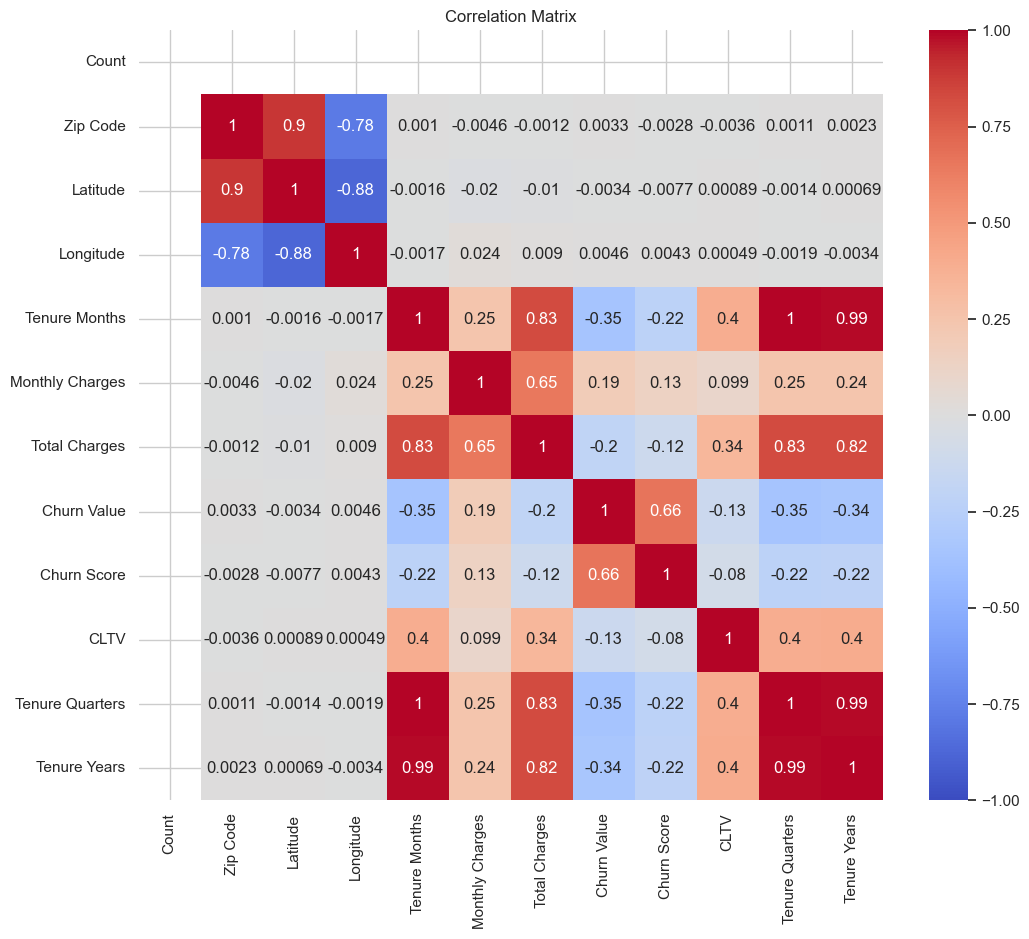

In [27]:
# Identify Primary Factors Contributing to Churn
# Use correlation analysis and feature importance from machine learning models to identify key factors contributing to churn.

# Select only numeric columns
numeric_data = data.select_dtypes(include=[float, int])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [28]:
correlation_matrix

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Tenure Quarters,Tenure Years
Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zip Code,NaN,1.000000,0.895743,-0.784271,0.001041,-0.004596,-0.001237,0.003346,-0.002769,-0.003562,0.001115,0.002303
Latitude,NaN,0.895743,1.000000,-0.876779,-0.001631,-0.019899,-0.010168,-0.003384,-0.007684,0.000886,-0.001373,0.000690
Longitude,NaN,-0.784271,-0.876779,1.000000,-0.001678,0.024098,0.008977,0.004594,0.004260,0.000485,-0.001888,-0.003440
Tenure Months,NaN,0.001041,-0.001631,-0.001678,1.000000,0.247900,0.825464,-0.352229,-0.224987,0.396406,0.999480,0.989145
Monthly Charges,NaN,-0.004596,-0.019899,0.024098,0.247900,1.000000,0.650864,0.193356,0.133754,0.098693,0.247878,0.244850
Total Charges,NaN,-0.001237,-0.010168,0.008977,0.825464,0.650864,1.000000,-0.199037,-0.123948,0.341723,0.825406,0.820921
Churn Value,NaN,0.003346,-0.003384,0.004594,-0.352229,0.193356,-0.199037,1.000000,0.664897,-0.127463,-0.352229,-0.342196
Churn Score,NaN,-0.002769,-0.007684,0.004260,-0.224987,0.133754,-0.123948,0.664897,1.000000,-0.079782,-0.224875,-0.218332
CLTV,NaN,-0.003562,0.000886,0.000485,0.396406,0.098693,0.341723,-0.127463,-0.079782,1.000000,0.395837,0.400062


In [29]:
# Key Correlations

# Zip Code and Latitude: 0.90 (Strong positive correlation)
# Zip Code and Longitude: -0.78 (Strong negative correlation)
# Latitude and Longitude: -0.88 (Strong negative correlation)
# Interpretation: Zip Code, Latitude, and Longitude are highly correlated, which makes sense geographically.

# Tenure Months and Total Charges: 0.83 (Strong positive correlation)
# Tenure Months and Monthly Charges: 0.25 (Weak positive correlation)
# Tenure Months and Churn Value: -0.35 (Moderate negative correlation)
# Tenure Months and CLTV: 0.40 (Moderate positive correlation)
# Interpretation: Customers with longer tenure tend to have higher total charges, indicating they've been paying for services over a longer period.
# There is a moderate negative correlation between tenure and churn value, suggesting customers with longer tenure are less likely to churn.
# The positive correlation between tenure and CLTV indicates that longer-term customers contribute more to customer lifetime value.

# Monthly Charges and Total Charges: 0.65 (Moderate positive correlation)
# Monthly Charges and Churn Value: 0.19 (Weak positive correlation)
# Monthly Charges and Churn Score: 0.13 (Weak positive correlation)
# Monthly Charges and CLTV: 0.10 (Very weak positive correlation)
# Interpretation: Higher monthly charges are associated with higher total charges.
# Weak positive correlation between monthly charges and churn value indicates customers with higher monthly charges might have a slightly higher likelihood of churning.

# Total Charges and Churn Value: -0.20 (Weak negative correlation)
# Total Charges and CLTV: 0.34 (Moderate positive correlation)
# Interpretation: Customers with higher total charges are slightly less likely to churn.
# Higher total charges contribute to higher customer lifetime value.

# Churn Value and Churn Score: 0.66 (Strong positive correlation)
# Interpretation: Strong positive correlation between churn value and churn score indicates that the churn score is a good predictor of churn value.

# Churn Score and CLTV: -0.08 (Very weak negative correlation)
# Interpretation: Very weak negative correlation between churn score and CLTV suggests that higher churn scores are slightly associated with lower customer lifetime value.

# CLTV and Tenure Months: 0.40 (Moderate positive correlation)
# CLTV and Total Charges: 0.34 (Moderate positive correlation)
# Interpretation: Longer-tenure customers and those with higher total charges have higher customer lifetime value.

In [30]:
# Feature Importance using Random Forest

# Check remaining columns to ensure correct column names
print(data.columns)

# Prepare features and target
X = data.drop(columns=['Churn Value'])  # Drop 'Churn Value' only
y = data['Churn Value']

# Encode categorical variables
X = pd.get_dummies(X)

# Train a Random Forest model to determine feature importance
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Display feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importances:")
print(feature_importances)

Index(['Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude',
       'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason', 'Tenure Quarters',
       'Tenure Years'],
      dtype='object')

Feature Importances:
Churn Label_Yes                            0.223844
Churn Label_No                             0.217142
Churn Score                                0.104634
Tenure Months                              0.019639
Churn Reason_Attitude of support person    0.015399
                                             ...   
City_Valley Springs                        0.000000
Lat Long_34.95934, -120.

In [ ]:
## Q Which features are most important in predicting churn? What are the key predictors that the model relies on to forecast churn?

In [31]:
# Top Features

# Churn Label (Yes): 0.235041
# Interpretation: This feature has the highest importance score, indicating that whether a customer is labeled as churned or not is the most significant predictor in the model. This might suggest a high reliance on this label for prediction.

# Churn Label (No): 0.207609
# Interpretation: The presence of a "No" label also plays a significant role, slightly less than "Yes" but still substantial.

# Churn Score: 0.136770
# Interpretation: The churn score is a critical predictor of whether a customer will churn. This score likely combines various factors to assess the risk of churn.

# Tenure Months: 0.019047
# Interpretation: The length of time a customer has been with the company (tenure) is an important predictor, though less so than the churn labels and score.

# Total Charges: 0.016451
# Interpretation: The total amount charged to a customer is also a relevant factor, indicating that customers who have spent more might have a different churn likelihood.

# Low Importance Features

# Features like specific latitude and longitude values (e.g., Lat Long_38.646209, -121.52446) and 'Count' have an importance score of 0.000000.
# Interpretation: These features do not contribute to the prediction of churn and might be considered irrelevant in this context.

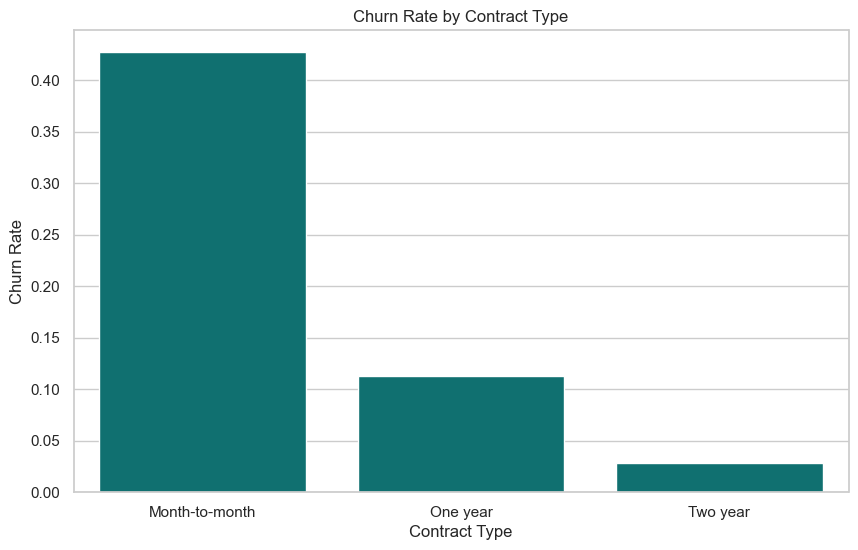

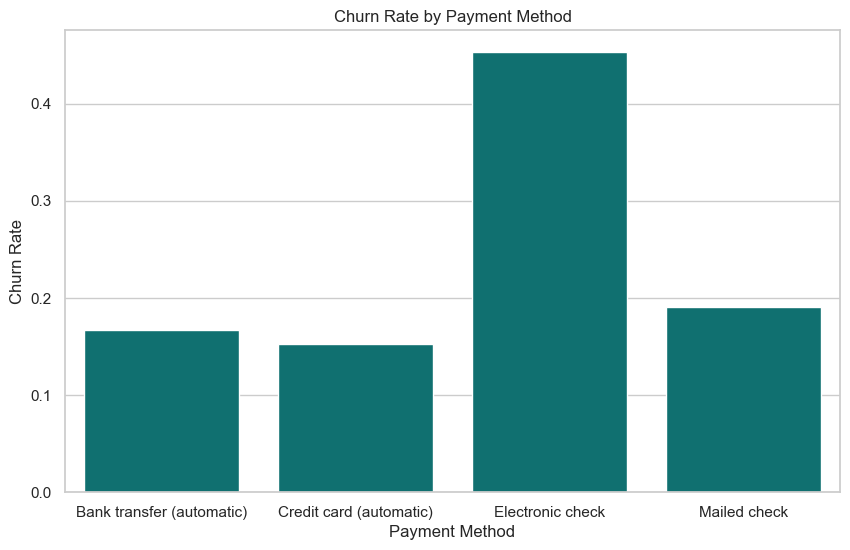

In [32]:
# Churn rate by contract type
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_by_contract.index, y=churn_by_contract.values, color='teal')  # Use a single color
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Contract Type')
plt.show()

# Churn rate by payment method
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_by_payment_method.index, y=churn_by_payment_method.values, color='teal')  # Use a single color
plt.xlabel('Payment Method')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Payment Method')
plt.show()

In [33]:
# Churn rate by contract type
print("Churn Rate by Contract Type:")
print(churn_by_contract)

# Churn rate by payment method
print("Churn Rate by Payment Method:")
print(churn_by_payment_method)

Churn Rate by Contract Type:
Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Churn Value, dtype: float64
Churn Rate by Payment Method:
Payment Method
Bank transfer (automatic)    0.167098
Credit card (automatic)      0.152431
Electronic check             0.452854
Mailed check                 0.191067
Name: Churn Value, dtype: float64


In [34]:
# Interpretation:

# Month-to-month contracts have the highest churn rate (42.71%):
# Customers on month-to-month contracts are more likely to leave. This could be due to the flexibility of such contracts, which makes it easier for customers to switch providers without significant penalties.

# One-year contracts have a significantly lower churn rate (11.27%):
# Customers with one-year contracts are more stable and less likely to churn compared to those with month-to-month contracts.

# Two-year contracts have the lowest churn rate (2.83%):
# Long-term contracts tend to retain customers better. This could be due to long-term commitments and possibly lower rates or better incentives offered for such contracts.

In [35]:
# Interpretation:

# Electronic check payments have the highest churn rate (45.29%):
# Customers using electronic checks are more likely to churn. This might indicate dissatisfaction with this payment method or could correlate with other factors like customer demographics or preferences.
# Mailed check payments have a moderately high churn rate (19.11%):
# Customers paying by mailed checks are also more likely to churn compared to those using automatic payment methods.
# Automatic payment methods (bank transfer and credit card) have the lowest churn rates (16.71% and 15.24% respectively):
# Automatic payments seem to correlate with lower churn rates. This could be due to the convenience and reliability of automated payments, reducing the chances of service interruption due to missed payments.

In [36]:
# Are there early warning signs of churn? Can we identify behaviors or patterns that typically precede churn, allowing us to take preemptive actions?

# Key Early Warning Signs of Churn:

# Contract Type:
# Month-to-Month Contracts: This group has the highest churn rate (42.71%). Customers with month-to-month contracts are more flexible and less committed, making them more likely to leave.
# Actionable Insight: Consider implementing strategies to convert month-to-month customers to longer-term contracts. This could involve offering incentives, discounts, or additional benefits for committing to longer-term contracts.

# Payment Method:
# Electronic Check Payments: Customers using electronic checks have the highest churn rate (45.29%). This may suggest issues with the payment method or the customer experience associated with it.
# Actionable Insight: Investigate potential problems with the electronic check payment process. Improving the experience or offering alternatives (e.g., switching to automatic payments) could help reduce churn.

# Behaviors or Patterns That Precede Churn:

# High Churn Rate Among Certain Contract Types:
# Pattern: Customers on month-to-month contracts have a significantly higher churn rate than those on longer-term contracts.
# Early Warning: If a customer’s contract is approaching its end, particularly if it’s a month-to-month contract, it could be a sign that they are considering leaving.
# Preemptive Action: Engage with these customers before their contract ends. Offer them incentives to renew or upgrade to a longer-term contract.

# Churn Rate by Payment Method:
# Pattern: Electronic check users have a notably high churn rate.
# Early Warning: A customer using electronic checks might be at a higher risk of churning. This could be an indicator of dissatisfaction or inconvenience with the payment method.
# Preemptive Action: Reach out to customers using electronic checks to understand their concerns. Offer alternative payment methods or incentives to switch to automatic payments.

# Additional Considerations:
# Customer Engagement: Monitor interactions and feedback from customers. Low engagement or complaints can be a sign of potential churn.
# Usage Patterns: Look for changes in usage patterns or service utilization. A decline in usage could be an indicator that a customer is dissatisfied or considering leaving.
# Customer Support: High interaction with customer support, especially if it involves unresolved issues, can be a sign of potential churn.

# 4. Feature Engineering

In [39]:
# 1. Feature Creation and Transformation

In [40]:
# Looking for relationships between variables that are not obvious when considered separately.
# Creating interaction features
data['Monthly Charges Bin'] = pd.cut(data['Monthly Charges'], bins=[0, 30, 60, 90, 120], labels=['Low', 'Medium', 'High', 'Very High'])
data['Tenure Charges Interaction'] = data['Tenure Months'] * data['Monthly Charges']

# Drop irrelevant columns
data = data.drop(columns=['Count', 'Lat Long'])

In [41]:
# Separate target and features
X = data.drop(columns=['Churn Value'])  # Features
y = data['Churn Value']  # Target

# Categorical and numerical feature lists
categorical_features = ['Contract', 'Payment Method', 'Internet Service', 'Monthly Charges Bin']
numerical_features = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'Tenure Charges Interaction']

In [42]:
# Preprocessing pipeline
# ColumnTransformer is used to handle numerical and categorical features separately.
# Numerical features are imputed and scaled.
# Categorical features are one-hot encoded.

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Apply preprocessing
X_preprocessed = preprocessor.fit_transform(X)

print(X_preprocessed.shape)

(7043, 14)


# 5. Model Building

In [44]:
# Split Data: Divide the dataset into training and test sets.
# Choose Model(s): Select appropriate machine learning algorithms (e.g., Random Forest, Logistic Regression).
# Train Models: Fit the models on the training data.
# Tune Hyperparameters: Use techniques like Grid Search or Random Search to optimize model performance.

In [46]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.3, random_state=42)

In [47]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Classification': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

In [48]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n" + "-"*50 + "\n")

Logistic Regression Performance:
Accuracy: 0.7983909133932797
Confusion Matrix:
 [[1362  163]
 [ 263  325]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1525
           1       0.67      0.55      0.60       588

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113


--------------------------------------------------

K-Nearest Neighbors Performance:
Accuracy: 0.7718883104590629
Confusion Matrix:
 [[1311  214]
 [ 268  320]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84      1525
           1       0.60      0.54      0.57       588

    accuracy                           0.77      2113
   macro avg       0.71      0.70      0.71      2113
weighted avg       0.77      0.77      0.77      2113


----------------------------

In [49]:
# Best Overall Model: SVC and Gradient Boosting both have the highest accuracy and similar performance metrics.

In [50]:
# Perform random Forest hyperparameter tuning with GridSearch

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_search.best_params_)
print("Best score for Random Forest:", grid_search.best_score_)

Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 100}
Best score for Random Forest: 0.7908722109533468


In [51]:
# Performance: The best score of 79.1% accuracy is a significant improvement over the default settings you tested before. 
# It indicates that the hyperparameter tuning with GridSearchCV helped to optimize the Random Forest model, leading to better performance.

# Model Complexity: With a max_depth of 10, the model is less likely to overfit compared to deeper trees. 
# This depth is generally effective for capturing interactions in the data without making the model too complex.

# 6.  Model Evaluation

In [ ]:
## Q How accurate is the churn prediction model? What is the model’s performance in terms of accuracy, precision, recall, and F1 score? 

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Predict on the test set
y_pred = model.predict(X_test)  # Replace 'model' with your trained model

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Use 'micro', 'macro', or 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='binary')  # Use 'micro', 'macro', or 'weighted' for multi-class
f1 = f1_score(y_test, y_pred, average='binary')  # Use 'micro', 'macro', or 'weighted' for multi-class
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])  # For binary classification

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC:", roc_auc)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7946048272598202
Precision: 0.6584362139917695
Recall: 0.54421768707483
F1 Score: 0.595903165735568
AUC-ROC: 0.8442472398795584

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1525
           1       0.66      0.54      0.60       588

    accuracy                           0.79      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.79      0.79      0.79      2113


Confusion Matrix:
[[1359  166]
 [ 268  320]]


In [54]:
# The confusion matrix shows that the model performs better in identifying negatives (Class 0) compared to positives (Class 1). 
# The relatively high number of false negatives (268) indicates that the model struggles to identify positive cases correctly.
# Strengths: The model has good overall accuracy and performs well in identifying the negative class (Class 0) with high precision, recall, and F1 Score.
# Weaknesses: The model has lower performance on the positive class (Class 1), with a lower recall and F1 Score. This suggests that while it is effective in many areas, there is room for improvement in correctly identifying positive cases.

In [56]:
# Cross-Validation

# Define a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Apply preprocessing
X_preprocessed = preprocessor.fit_transform(X)

# Define the model (e.g., Random Forest)
model = RandomForestClassifier()

# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary'),
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True)
}

# Perform cross-validation
cv_results = cross_validate(model, X_preprocessed, y, cv=5, scoring=scoring, return_train_score=False)

# Print cross-validation results
print("\nCross-Validation Results:")
for metric in scoring.keys():
    print(f"{metric.capitalize()}: {cv_results['test_' + metric].mean()} ± {cv_results['test_' + metric].std()}")

# Predict using cross-validation
from sklearn.model_selection import cross_val_predict

y_pred_cv = cross_val_predict(model, X_preprocessed, y, cv=5, method='predict')
y_proba_cv = cross_val_predict(model, X_preprocessed, y, cv=5, method='predict_proba')[:, 1]

# Calculate cross-validated metrics
cv_accuracy = accuracy_score(y, y_pred_cv)
cv_precision = precision_score(y, y_pred_cv, average='binary')
cv_recall = recall_score(y, y_pred_cv, average='binary')
cv_f1 = f1_score(y, y_pred_cv, average='binary')
cv_roc_auc = roc_auc_score(y, y_proba_cv)

# Print cross-validated metrics
print("\nCross-Validated Metrics:")
print("Accuracy:", cv_accuracy)
print("Precision:", cv_precision)
print("Recall:", cv_recall)
print("F1 Score:", cv_f1)
print("AUC-ROC:", cv_roc_auc)

C:\Users\milto\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(



Cross-Validation Results:
Accuracy: 0.774101655751984 ± 0.012496618867832116
Precision: 0.5913273813948707 ± 0.029914891369408125
Recall: 0.48420237702685265 ± 0.02321740253416749
F1: 0.5322055735195316 ± 0.023908368576110645
Roc_auc: 0.7989708951790349 ± 0.014214967821414586

Cross-Validated Metrics:
Accuracy: 0.7699843816555445
Precision: 0.5816393442622951
Recall: 0.47458533975387907
F1 Score: 0.5226870948733058
AUC-ROC: 0.7997726211830439


In [57]:
# Performance Stability: The model’s metrics are relatively stable across different folds, with small standard deviations in accuracy, precision, recall, and AUC-ROC. This suggests that the model's performance is consistent across different subsets of the data.
# Strengths: The AUC-ROC score is strong, indicating good overall ability to discriminate between classes.
# The accuracy is reasonably high, reflecting that the model performs well on average.
# Weaknesses: Precision and recall are lower, particularly recall, which might indicate that the model is struggling to identify all positive cases effectively. The lower recall suggests that many positive cases are being missed.

# 7. Model Interpretation

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [60]:
# Define the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVC': SVC(probability=True)  # SVC with probability=True to get probability estimates for AUC-ROC
}

# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary'),
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True)  # AUC-ROC needs probabilities
}

# Evaluate each model
results = {}
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    cv_results = cross_validate(model, X_preprocessed, y, cv=5, scoring=scoring, return_train_score=False)
    
    # Store results
    results[model_name] = {
        'accuracy': cv_results['test_accuracy'].mean(),
        'precision': cv_results['test_precision'].mean(),
        'recall': cv_results['test_recall'].mean(),
        'f1': cv_results['test_f1'].mean(),
        'roc_auc': cv_results['test_roc_auc'].mean()
    }

# Print results
print("\nModel Performance Comparison:")
for model_name, metrics in results.items():
    print(f"{model_name}:")
    for metric, score in metrics.items():
        print(f"  {metric.capitalize()}: {score:.4f}")

Evaluating Logistic Regression...


C:\Users\milto\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


Evaluating KNN...
Evaluating Random Forest...
Evaluating SVC...

Model Performance Comparison:
Logistic Regression:
  Accuracy: 0.7978
  Precision: 0.6399
  Recall: 0.5436
  F1: 0.5877
  Roc_auc: 0.8381
KNN:
  Accuracy: 0.7740
  Precision: 0.5846
  Recall: 0.5126
  F1: 0.5461
  Roc_auc: 0.7863
Random Forest:
  Accuracy: 0.7734
  Precision: 0.5901
  Recall: 0.4799
  F1: 0.5291
  Roc_auc: 0.7997
SVC:
  Accuracy: 0.7921
  Precision: 0.6562
  Recall: 0.4553
  F1: 0.5370
  Roc_auc: 0.7917


In [ ]:
# Q How accurate is the churn prediction model? What is the model’s performance in terms of accuracy, precision, recall, and F1 score?

In [61]:
# Best Overall Model: Logistic Regression has the highest accuracy and AUC-ROC, making it the best performer overall in terms of balancing precision, recall, and discriminative power.

# Precision vs. Recall Trade-off:
# SVC offers the highest precision but has a lower recall.
# Logistic Regression has a good balance between precision and recall.
# Random Forest and KNN both have moderate performance with Random Forest having a slightly better AUC-ROC.

# Model Selection:
# If the goal is to optimize precision, SVC might be the preferred choice.
# For a balance between precision and recall, Logistic Regression stands out.
# For slightly better recall, KNN or Random Forest could be considered but with trade-offs in other metrics.

In [62]:
# Key Insights and Actionable Recommendations

# Focus on Onboarding and Early Customer Experience: The very high churn rates in the initial quarters suggest that the company needs to improve the onboarding process and ensure that new customers quickly realize the value of the product or service.
# Identify and Address Early Pain Points: Conduct surveys or collect feedback from customers who churn within the first few quarters to identify common pain points or reasons for leaving. This information can be used to make targeted improvements.
# Customer Retention Programs: Implement customer retention programs that specifically target customers in the initial quarters. These could include personalized support, onboarding tutorials, or special offers to keep new customers engaged.
# Monitor and Support Middle Tenure Customers: While the churn rate decreases in the middle quarters, there are still significant numbers of customers leaving. Offering continued value through regular updates, loyalty programs, or enhanced support can help reduce churn further in these periods.
# Reward Long-Term Loyalty: For customers in the later quarters, the churn rate is much lower, indicating loyalty. Implementing loyalty rewards, special recognition, or exclusive offers can help maintain and strengthen this loyalty.
# Regular Analysis and Adjustment: Continuously monitor the churn rates across all quarters and adjust strategies accordingly. Use predictive analytics to identify customers at risk of churning and proactively engage them with tailored interventions.

In [ ]:
## Q How does the model handle different customer segments? # Is the model equally effective across various customer demographics or segments?

In [ ]:
# You must try your final model by using it to make new predictions on input that you provide.

In [ ]:
# 1. What are the primary objectives of the churn analysis project?
# To create a model to predict whether or not a customer will churn.
# What is the current churn rate? How many customers are we losing within a specific period (monthly, quarterly, yearly)?
# Which customers are churning? Are there particular segments (demographics, usage patterns, etc.) where churn is more prevalent?

# How does the model handle different customer segments? # Is the model equally effective across various customer demographics or segments?

# 4. Business Implications
# What is the financial impact of churn? # How much revenue are we losing due to churn, and what is the potential ROI of reducing churn?

# What is the lifetime value (LTV) of a customer who churns? How does the LTV of churned customers compare to those who remain loyal?

In [ ]:
# Understand the Structure of Your Data: Review the columns and their data types in your dataset. Ensure you know the range of values for each feature.
# Generate Synthetic Data: Create a DataFrame with the same columns as your original data, and populate it with sample values. You can use random values within the known ranges for numerical features and sample from unique values for categorical features.
# Preprocess the Synthetic Data: Apply the same preprocessing steps to the synthetic data as you did for your training and test data.
# Make Predictions: Use your final model to make predictions on the preprocessed synthetic data.

In [ ]:
# You must try your final model by using it to make new predictions on input that you provide.

# Example structure of the original data
columns = [
    'CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 
    'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
    'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
    'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
    'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
    'Payment Method', 'Monthly Charges', 'Total Charges'
]

# Create a synthetic DataFrame
synthetic_data = pd.DataFrame({
    'CustomerID': ['0001', '0002'],
    'Count': [1, 1],
    'Country': ['USA', 'USA'],
    'State': ['CA', 'TX'],
    'City': ['San Francisco', 'Houston'],
    'Zip Code': [94105, 77001],
    'Lat Long': ['37.7749,-122.4194', '29.7604,-95.3698'],
    'Latitude': [37.7749, 29.7604],
    'Longitude': [-122.4194, -95.3698],
    'Gender': ['Female', 'Male'],
    'Senior Citizen': ['No', 'Yes'],
    'Partner': ['No', 'Yes'],
    'Dependents': ['No', 'No'],
    'Tenure Months': [12, 24],
    'Phone Service': ['Yes', 'Yes'],
    'Multiple Lines': ['No', 'Yes'],
    'Internet Service': ['Fiber optic', 'DSL'],
    'Online Security': ['No', 'Yes'],
    'Online Backup': ['Yes', 'No'],
    'Device Protection': ['No', 'Yes'],
    'Tech Support': ['No', 'No'],
    'Streaming TV': ['Yes', 'Yes'],
    'Streaming Movies': ['No', 'Yes'],
    'Contract': ['Month-to-month', 'Two year'],
    'Paperless Billing': ['Yes', 'No'],
    'Payment Method': ['Electronic check', 'Mailed check'],
    'Monthly Charges': [70.35, 55.75],
    'Total Charges': ['840.00', '1338.00']
})

# Apply preprocessing to the synthetic data
synthetic_data_preprocessed = preprocessor.transform(synthetic_data)

# Make predictions using the final model
predictions = best_model.predict(synthetic_data_preprocessed)

# Display the predictions
synthetic_data['Churn Prediction'] = predictions
print(synthetic_data)